# Binary Town 


Consider a town that contains only kids and adults. Each person in this town is associated with a height. Also, the probability of a random person in this town being a kid is $pKid$ and that of being an adult is $pAdult=1-pKid$. 

(a) Simulate 1000 people in this town by taking $pKid=0.4$. Assume that the height of any person is a value from the set $htSet=\{4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8\}$. Also,  the probability that a person has a specific height given that the person is a kid is given by $pHtKid=[0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]$ and the probability that a person has a specific height given that the person is an adult is given by $pHtAdult=[0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, $ $0.18, 0.18, 0.18]$. That is, the probability that a kid has height $5.1$ is $0.1$, the probability that an adult has height $5.4$ is $0.18$ and so on. Show the histograms of heights of both the groups in different colors in a single plot. 

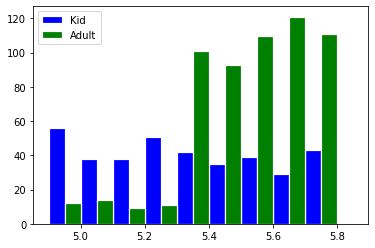

In [75]:
import numpy as np                         #importing necessary modules
import random
import matplotlib.pyplot as plt
pKid = 0.4
hSet = [4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8]
phKid = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
phAdult = [0.02,0.02,0.02,0.02,0.02,0.18,0.18,0.18,0.18,0.18]
person = np.random.choice([0,1],1000,p=[pKid,1-pKid])         #generating random person based on the probability of kid and adult
kid=[]            #declaring the empty list to store the height of kid
adult=[]          #declaring the empty list to store the height of adult
heights=[]        #declaring the empty list to store the heights of all person
for i in person:
    if i==0:      #check for kid
        h = np.random.choice(hSet,1,p=phKid)[0]    #generating random height according to the probability given for kid
        kid.append(h)
        heights.append(h)
    else:
        h = np.random.choice(hSet,1,p=phAdult)[0]  #generating random height according to the probability given for adult
        adult.append(h)
        heights.append(h)
# plotting the histogram of height of kid and adult 
plt.hist(kid,color='Blue',label='Kid',linewidth=1.2,width=0.05,edgecolor='White',bins=np.arange(4.9, 5.9, 0.1))
plt.hist(adult,color='Green',label='Adult',linewidth=1.2,width=0.05,edgecolor='White',bins=np.arange(4.95, 5.95, 0.1))
plt.legend()
plt.show()

(b) Implement an agent that classifies each sample generated in part (a) as kid or adult using Bayes' Rule. Measure the accuracy of the classifier in terms of the fraction of correct predictions. You may assume that the agent knows $pKid$, $htSet$, $pHtKid$ and $pHtAdult$.

In [76]:
ph=[]
ppl=[]                                                   #declaring empty list to store the answer given by the agent
for i in range(len(hSet)):
    ph.append(0.4*phKid[i] + 0.6*phAdult[i])             #calculating the probability(height) for each height in hSet
for i in range(1000):
    pkh = (0.4*phKid[hSet.index(heights[i])])/ph[hSet.index(heights[i])]   #calculating probability kid given height
    pah = (0.6*phAdult[hSet.index(heights[i])])/ph[hSet.index(heights[i])] #calculating probability adult given height
    if pkh>pah:
        ppl.append(0)
    else:
        ppl.append(1)
accuracy=0
for i in range(1000):
    if ppl[i]==person[i]:                              #checking if the agent's answer is correct or not
        accuracy = accuracy+1
print(f"the accuracy of the agent is {accuracy/1000}") #calculating the accuracy of the agent

the accuracy of the agent is 0.761


(c) Assume that the height of a person can take on any value in $\mathbb{R}$. Repeat parts (a) and (b) when probability distributions of height given kid and height given adult are given by $f_{h|k}(x) =
\begin{cases}
  1 & \text{if } 4.5 \leq x \leq 5.0 \\
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  0 & \text{otherwise}
\end{cases}$ and $f_{h|a}(x) =
\begin{cases}
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  1 & \text{if } 5.25 \leq x \leq 5.75 \\
  0 & \text{otherwise}
\end{cases}$
    
  

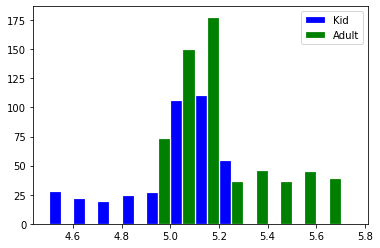

In [77]:
#function to find the height corresponding to the given probability for kid
def cdfKid(y):
    if y<=0.5:
        x=4.5+y
    else:
        x = (y+9.5)/2
    return x
#function to find the height corresponding to the given probability for adult
def cdfAdult(y):
    if y<=0.5:
        x = (y+10)/2
    else:
        x = y+4.75
    return x
person = np.random.choice([0,1],1000,p=[0.4,0.6])  #generating random person based on the probability of kid and adult    
Kid_h=[]                                           #empty list to store the height of kid  
Adult_h=[]                                         #empty list to store the height of adult
heights=[]                                         #empty list to store the height of all person
for i in person:
    if i==0:                                       #for kid
        a=random.uniform(0,0.5)
        b=random.uniform(0.5,1)
        y = np.random.choice([a,b],1,p=[1/3,2/3])[0] #generating random probability
        h = cdfKid(y)                                #calling the function to calculate the height corresponding to probability
        Kid_h.append(h)
        heights.append(h)
    else:                                            #for adult
        a=random.uniform(0,0.5)
        b=random.uniform(0.5,1)
        y = np.random.choice([a,b],1,p=[2/3,1/3])[0] #generating random probability
        h = cdfAdult(y)                              #calling the function to calculate the height corresponding to probability
        Adult_h.append(h)
        heights.append(h)
#plotting the histogram of heights of kid and adult
plt.hist(Kid_h,color='Blue',label='Kid',linewidth=1.2,width=0.05,edgecolor='White',bins=np.arange(4.5, 5.8, 0.1))
plt.hist(Adult_h,color='Green',label='Adult',linewidth=1.2,width=0.05,edgecolor='White',bins=np.arange(4.55, 5.85, 0.1))
plt.legend()
plt.show()

In [78]:
#function to calculate the probabilty for a given height for kid 
def prob_kid(x):
    if x>=4.5 and x<=5:
        return 1
    elif x>=5 and x<=5.25:
        return 0.4
    else:
        return 0
#function to calculate the probabilty for a given height for adult
def prob_adult(x):
    if x>=5 and x<=5.25:
        return 0.6
    elif x>=5.25 and x<=5.75:
        return 1
    else:
        return 0
ppl=[]                             #empty list to store the answer given by the agent
for i in heights:
    pkh = prob_kid(i)              #calculating the probability of kid given height for height i
    pah = prob_adult(i)            #calculating the probability of adult given height for height i
    if pkh>pah:
        ppl.append(0)
    else:
        ppl.append(1)
accuracy=0
for i in range(1000):
    if ppl[i]==person[i]:          #check if the answer given by the agent is correct
        accuracy = accuracy+1
print(f"the accuracy of the agent is {accuracy/1000}")               #calculating the accuracy of the agent

the accuracy of the agent is 0.728


(d) Assume that each person in the town has two attributes - height and weight that take on values from $\mathbb{R}$. The 
probability distributions of height given kid and height given adult are $N(\mu_{11},\sigma_{11}^2)$ and $N(\mu_{21},\sigma_{21}^2)$, respectively. Similarly, The 
probability distributions of weight given kid and weight given adult are $N(\mu_{12},\sigma_{12}^2)$ and $N(\mu_{22},\sigma_{22}^2)$, respectively. Here $N(\mu,\sigma^2)$ denotes the Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Simulate 1000 people in this town assuming $pKid=.4$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.5,\mu_{12}=20,\mu_{21}=5,\mu_{22}=40$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 





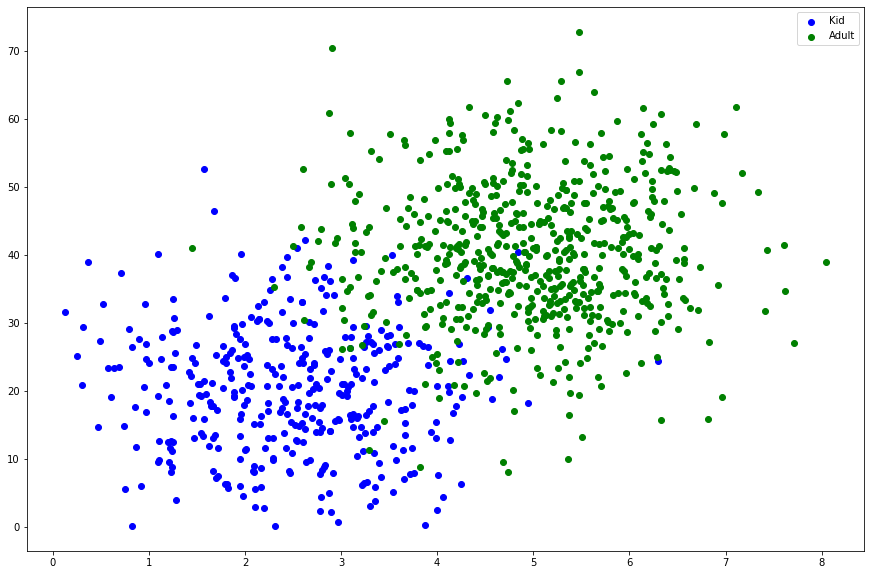

In [79]:
person = np.random.choice([0,1],1000,p=[0.4,0.6])      #generating random person based on the probability of kid and adult    
# create empty lists for storing heights and weights of kids and adults
phgKid=[]                               
pwgKid=[]
phgAdult=[]
pwgAdult=[]
height=[]
weight=[]
ppl=[]

# iterate through each element of the "person" array
for i in person:
    
    # if the element is 0 (representing a kid), generate random height and weight using normal distribution
    if i==0:
        x1=np.random.normal(2.5,1,1)
        x2=np.random.normal(20,10,1)
        
        # check if the generated values are negative, and skip to the next iteration if they are
        if x1<0 or x2<0:
            continue
            
        # otherwise, append the values to the corresponding lists
        else:
            phgKid.append(x1)
            pwgKid.append(x2)
            height.append(x1)
            weight.append(x2)
            ppl.append(i)
            
    # if the element is 1 (representing an adult), generate random height and weight using normal distribution
    else:
        y1=np.random.normal(5,1,1)
        y2=np.random.normal(40,10,1)
        
        # check if the generated values are negative, and skip to the next iteration if they are
        if y1<0 or y2<0:
            continue
            
        # otherwise, append the values to the corresponding lists
        else:
            phgAdult.append(y1)
            pwgAdult.append(y2)
            height.append(y1)
            weight.append(y2)
            ppl.append(i)

# create a scatter plot of heights vs. weights for kids and adults
plt.figure(figsize=(15,10))
plt.scatter(phgKid,pwgKid,c='Blue',label='Kid')
plt.scatter(phgAdult,pwgAdult,c='Green',label='Adult')
plt.legend()
plt.show()

(e) Let $S$ denote the set of samples generated in part (d). Given a height-weight pair $(x, y)$, write a function that finds $k$ nearest points in $S$ for each $k \in \{ 5, 10, 15\}$. The distance between $(x, y)$ and $(x_i, y_i)$ is defined as $\sqrt{(x_i-x)^2 + (y_i-y)^2}$. For each $k$, show a scatter plot with $(x, y)$ in one color, its $k$ nearest points in another color and the other points in $S$ in a third color. Also, use the $k$ nearest points of $(x, y)$ and the majority function to classify $(x, y)$ as  belonging to a kid or an adult. 

6
69
(6,69) is adult


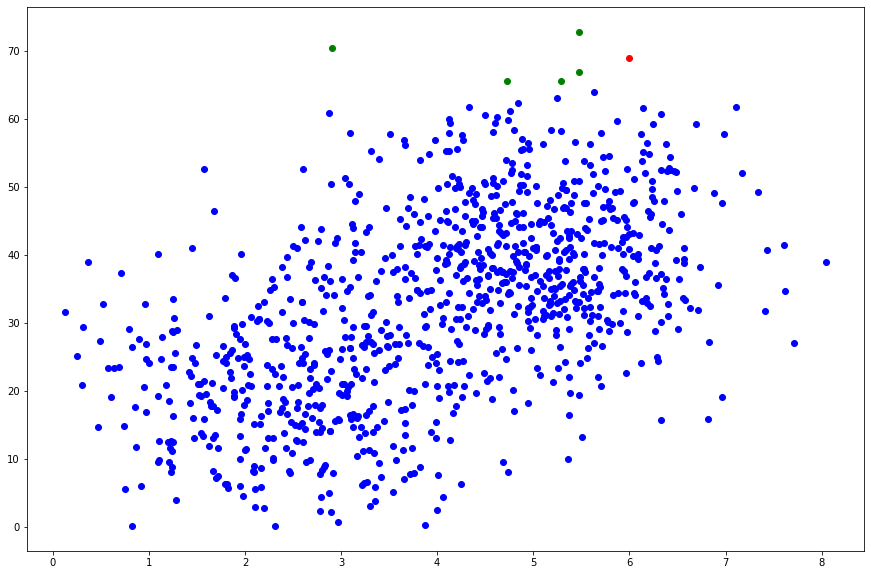

(6,69) is adult


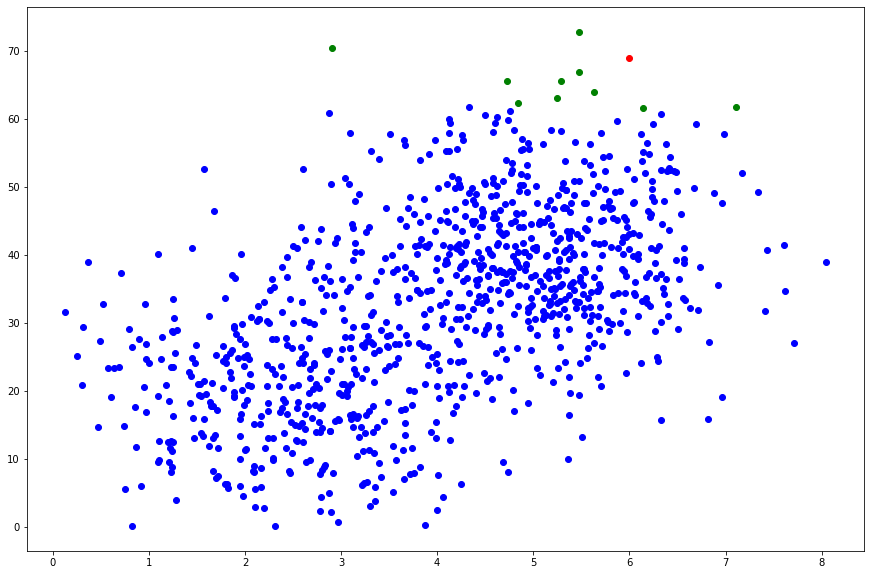

(6,69) is adult


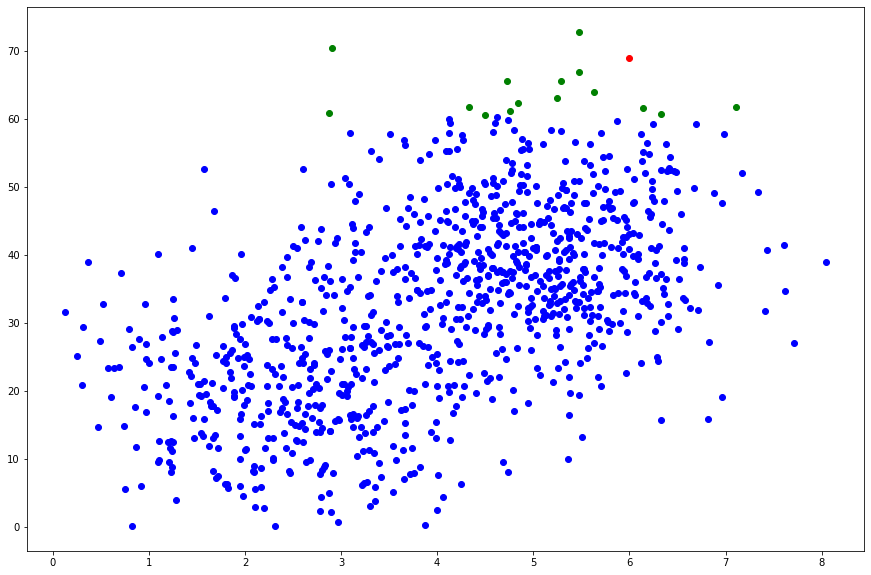

In [80]:
# import numpy library and alias it as "np"
import numpy as np
# import matplotlib.pyplot library and alias it as "plt"
import matplotlib.pyplot as plt

#taking the input of the value x and y
x = int(input())
y = int(input())
v=[5,10,15]                #list v to store the value of k
for k in v:                # iterate through each element of the "v" list
    tppl=ppl.copy()
    theight=height.copy()
    tweight=weight.copy()
    nh=[]                  # create empty lists for storing heights and weights of nearest neighbors
    nw=[]
    num_kid=0              # initialize counters for the number of kids and adults among the nearest neighbors
    num_adult=0
    distance=[]            # create an empty list for storing distances between each person's height and weight and the given (x,y) coordinates
    for i in range(len(theight)):                                     # iterate through each index "i" in the range of the length of the "height" list
        distance.append(((theight[i]-x)**2+(tweight[i]-y)**2)**0.5)    # calculate the Euclidean distance between the (x,y) coordinates and the height and weight of each person
    for i in range(k):
#         m=distance.index(min(distance))            # find the index "m" of the minimum distance in the "distance" list
        mn=distance[0]
        for j in range(1,len(distance)):
            if mn>distance[j]:
                mn = distance[j]
                m=j
        nh.append(theight[m])                       # append the height and weight of the person with the minimum distance to the corresponding lists
        nw.append(tweight[m])
        
        # remove the height, weight, and person type information for the selected person from the corresponding lists
        distance.remove(distance[m])
        theight.remove(theight[m])
        tweight.remove(tweight[m])
        tppl.remove(tppl[m])
        
    #loop for finding the majority within the nearest points
    for i in range(len(nh)):
        if nh[i] in phgKid:
            lst=[]
            for l in range(len(phgKid)):
                if phgKid[l]==nh[i]:
                    lst.append(l)
            for l in range(len(lst)):
                if pwgKid[lst[l]]==nw[i]:
                    num_kid+=1
                    break
        if nh[i] in phgAdult:
            lst=[]
            for l in range(len(phgAdult)):
                if phgAdult[l]==nh[i]:
                    lst.append(l)
            for l in range(len(lst)):
                if pwgAdult[lst[l]]==nw[i]:
                    num_adult+=1
                    break
        
    # determine whether there are more kids or adults among the nearest neighbors
    if num_kid>num_adult:
        print(f"({x},{y}) is Kid")
    elif num_kid==num_adult:
        print(f"there is no majority")
    else:
        print(f"({x},{y}) is adult")
        
# create a scatter plot with the following points: (x,y) in red, remaining people in blue, and nearest neighbors in green
    plt.figure(figsize=(15,10))
    plt.scatter(x,y,color='red')
    plt.scatter(theight,tweight,color='blue')
    plt.scatter(nh,nw,color='green')
    plt.show()